In [1]:
import sys
# Añadimos la ruta de la carpeta 'pykan'
sys.path.append('/Users/lucia/Desktop/classification_methods/pykan')

# Ahora ya puedes importar la librería 'kan'
from kan import *


In [2]:
from kan import KAN
print(KAN)


<class 'kan.KAN.KAN'>


https://medium.com/accredian/kolmogorov-arnold-networks-kans-vs-multi-layer-perceptrons-mlps-a-comparison-9e33359564c2

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

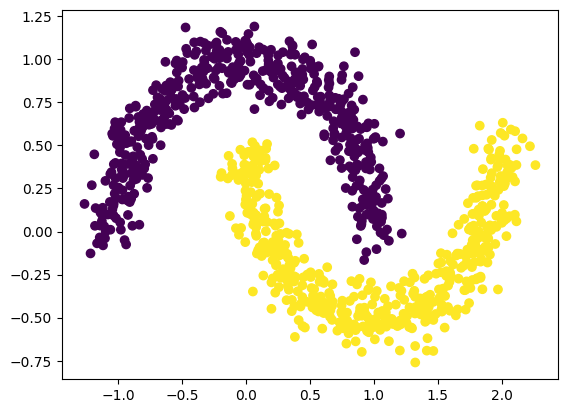

In [4]:
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label)
dataset['test_label'] = torch.from_numpy(test_label)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:])

In [5]:
dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label).long()
dataset['test_label'] = torch.from_numpy(test_label).long()


In [6]:
from kan import KAN

model = KAN(width=[2,2], grid=3, k=3)

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']),
    dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']),
    dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=20,
          metrics=(train_acc, test_acc),
          loss_fn=torch.nn.CrossEntropyLoss())


train loss: 0.00e+00 | test loss: 2.09e-01 | reg: 6.95e+01 : 100%|██| 20/20 [00:01<00:00, 15.39it/s]


In [7]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9569749236106873
fixing (0,0,1) with sin, r2=0.9640929698944092
fixing (0,1,0) with sqrt, r2=0.9710515141487122
fixing (0,1,1) with sqrt, r2=0.9702324867248535


In [8]:
formula1, formula2 = model.symbolic_formula()[0]


In [9]:
def acc(formula1, formula2, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):

        logit1 = np.array(formula1.subs('x_1',
                          X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2',
                          X[i,1])).astype(np.float64)

        correct += (logit2 > logit1) == y[i]

    return correct/batch

# Print Accuracy
print('train acc of the formula:', acc(formula1,
                                       formula2,
                                       dataset['train_input'],
                                       dataset['train_label']))

print('test acc of the formula:', acc(formula1,
                                      formula2,
                                      dataset['test_input'],
                                      dataset['test_label']))

train acc of the formula: tensor(0.9960)
test acc of the formula: tensor(0.9930)


In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [11]:
# Extract data
X_train = dataset['train_input'].numpy()
y_train = dataset['train_label'].numpy()
X_test = dataset['test_input'].numpy()
y_test = dataset['test_label'].numpy()

In [12]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Train the MLPClassifier
clf = MLPClassifier(alpha=1, max_iter=1000)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [14]:
# Calculate training and test accuracies
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

In [15]:
# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Test Accuracy: 0.98
